In [0]:
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,BooleanType,DateType,DecimalType
from pyspark.sql.functions import col,when,row_number,when,sum,avg
from pyspark.sql.window import Window



In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)])

In [0]:
ball_by_ball_df=spark.read.schema(ball_by_ball_schema).csv("s3://ipl-data-eng-project/Ball_By_Ball.csv",header=True)

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date",StringType(), True),
    StructField("season_year", IntegerType(), True),  # Note: PySpark does not have YearType, using IntegerType instead
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df=spark.read.schema(match_schema).csv("s3://ipl-data-eng-project/Match.csv",header=True)

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_df=spark.read.schema(player_schema).csv("s3://ipl-data-eng-project/Player.csv",header=True)

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),  # Adjust precision and scale as needed
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # Note: PySpark does not have YearType, using IntegerType instead
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
player_match_df=spark.read.schema(player_match_schema).csv("s3://ipl-data-eng-project/Player_match.csv",header=True)

In [0]:

team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [0]:
team_df=spark.read.csv("s3://ipl-data-eng-project/Team.csv",header=True)


In [0]:
#filter to include only valid delievers(excluding extras like wides and no balls for specific analysis)
ball_by_ball_df=ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))
# Aggregation: Calculate the total and average runs scored in each match and inning
total_avg_runs=ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),avg("runs_scored").alias("runs_avg")
                                                                   )

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|  

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)
limited_df=ball_by_ball_df.limit(10)
display(limited_df)

match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,wides,legbyes,byes,noballs,penalty,bowler_extras,out_type,caught,bowled,run_out,lbw,retired_hurt,stumped,caught_and_bowled,hit_wicket,obstructingfeild,bowler_wicket,match_date,season,striker,non_striker,bowler,player_out,fielders,striker_match_sk,strikersk,nonstriker_match_sk,nonstriker_sk,fielder_match_sk,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk,high_impact
598028,15,6,1,5,2,6,No Extras,4,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,277,104,83,null,null,20336,276,20333,103,-1,-1,20343,82,-1,4,1,null,0,null,false
598028,14,1,1,5,2,5,No Extras,1,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,104,6,346,null,null,20333,103,20328,5,-1,-1,20348,345,-1,4,1,null,0,null,false
598028,14,2,1,5,2,3,No Extras,1,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,6,104,346,null,null,20328,5,20333,103,-1,-1,20348,345,-1,4,1,null,0,null,false
598028,14,3,1,5,2,5,No Extras,1,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,104,6,346,null,null,20333,103,20328,5,-1,-1,20348,345,-1,4,1,null,0,null,false
598028,14,4,1,5,2,3,No Extras,0,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,6,104,346,null,null,20328,5,20333,103,-1,-1,20348,345,-1,4,1,null,0,null,false
598028,14,5,1,5,2,3,No Extras,4,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,6,104,346,null,null,20328,5,20333,103,-1,-1,20348,345,-1,4,1,null,0,null,false
598028,14,6,1,5,2,3,No Extras,2,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,6,104,346,null,null,20328,5,20333,103,-1,-1,20348,345,-1,4,1,null,0,null,false
598028,13,1,1,5,2,5,No Extras,1,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,104,6,83,null,null,20333,103,20328,5,-1,-1,20343,82,-1,4,1,null,0,null,false
598028,13,2,1,5,2,3,No Extras,4,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,6,104,83,null,null,20328,5,20333,103,-1,-1,20343,82,-1,4,1,null,0,null,false
598028,13,3,1,5,2,3,No Extras,1,0,0,0,0,0,0,0,Not Applicable,null,null,null,null,null,null,null,null,null,null,null,2013,6,104,83,null,null,20328,5,20333,103,-1,-1,20343,82,-1,4,1,null,0,null,false


In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when, to_date
# Extracting year, month, and day from the match date for more detailed time-based analysis
date_format = "M/d/yyyy"

# تحويل العمود إلى DateType
match_df = match_df.withColumn("match_date", to_date("match_date", date_format))

match_df= match_df.withColumn("year", year("match_date"))
match_df= match_df.withColumn("month", month("match_date"))
match_df= match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)
# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame

limited_df1=match_df.limit(10)
display(limited_df1)



match_sk,match_id,team1,team2,match_date,season_year,venue_name,city_name,country_name,toss_winner,match_winner,toss_name,win_type,outcome_type,manofmach,win_margin,country_id,year,month,day,win_margin_category,toss_match_winner
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140,1,2008,4,18,High,No
1,335988,Kings XI Punjab,Chennai Super Kings,2008-04-19,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33,1,2008,4,19,Low,Yes
2,335989,Delhi Daredevils,Rajasthan Royals,2008-04-19,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9,1,2008,4,19,Low,No
3,335990,Mumbai Indians,Royal Challengers Bangalore,2008-04-20,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5,1,2008,4,20,Low,No
4,335991,Kolkata Knight Riders,Deccan Chargers,2008-04-20,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5,1,2008,4,20,Low,No
5,335992,Rajasthan Royals,Kings XI Punjab,2008-04-21,2008,Sawai Mansingh Stadium,Jaipur,India,Kings XI Punjab,Rajasthan Royals,bat,wickets,Result,SR Watson,6,1,2008,4,21,Low,No
6,335993,Deccan Chargers,Delhi Daredevils,2008-04-22,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Deccan Chargers,Delhi Daredevils,bat,wickets,Result,V Sehwag,9,1,2008,4,22,Low,No
7,335994,Chennai Super Kings,Mumbai Indians,2008-04-23,2008,"MA Chidambaram Stadium, Chepauk",Chennai,India,Mumbai Indians,Chennai Super Kings,field,runs,Result,ML Hayden,6,1,2008,4,23,Low,No
8,335995,Deccan Chargers,Rajasthan Royals,2008-04-24,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Rajasthan Royals,Rajasthan Royals,field,wickets,Result,YK Pathan,3,1,2008,4,24,Low,Yes
9,335996,Kings XI Punjab,Mumbai Indians,2008-04-25,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Mumbai Indians,Kings XI Punjab,field,runs,Result,KC Sangakkara,66,1,2008,4,25,Medium,No


In [0]:

from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"), "Left-Handed").otherwise("Right-Handed")
)
# Show the modified player DataFrame
limited_df2=player_df.limit(10)
display(limited_df2)

player_sk,player_id,player_name,dob,batting_hand,bowling_skill,country_name,batting_style
0,1,sc ganguly,null,Left-hand bat,Right-arm medium,India,Left-Handed
1,2,bb mccullum,null,Right-hand bat,Right-arm medium,New Zealand,Right-Handed
2,3,rt ponting,null,Right-hand bat,Right-arm medium,Australia,Right-Handed
3,4,dj hussey,null,Right-hand bat,Right-arm offbreak,Australia,Right-Handed
4,5,mohammad hafeez,null,Right-hand bat,Right-arm offbreak,Pakistan,Right-Handed
5,6,r dravid,null,Right-hand bat,Right-arm offbreak,India,Right-Handed
6,7,w jaffer,null,Right-hand bat,Right-arm offbreak,India,Right-Handed
7,8,v kohli,null,Right-hand bat,Right-arm medium,India,Right-Handed
8,9,jh kallis,null,Right-hand bat,Right-arm fast-medium,South Africa,Right-Handed
9,10,cl white,null,Right-hand bat,Legbreak googly,Australia,Right-Handed


In [0]:
from pyspark.sql.functions import col, when, current_date, year

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the enriched DataFrame
limited_df3=player_match_df.limit(10)
display(limited_df3)


player_match_sk,playermatch_key,match_id,player_id,player_name,dob,batting_hand,bowling_skill,country_name,role_desc,player_team,opposit_team,season_year,is_manofthematch,age_as_on_match,isplayers_team_won,batting_status,bowling_status,player_captain,opposit_captain,player_keeper,opposit_keeper,veteran_status,years_since_debut
-1,-1.00,-1,-1,N/A,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,Non-Veteran,null
12694,null,335987,6,R Dravid,null,Right-hand bat,Right-arm offbreak,India,Captain,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,35,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Veteran,16
12695,null,335987,7,W Jaffer,null,Right-hand bat,Right-arm offbreak,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,30,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16
12696,null,335987,8,V Kohli,null,Right-hand bat,Right-arm medium,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,20,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16
12697,null,335987,9,JH Kallis,null,Right-hand bat,Right-arm fast-medium,South Africa,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,33,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16
12698,null,335987,10,CL White,null,Right-hand bat,Legbreak googly,Australia,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,25,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16
12699,null,335987,11,MV Boucher,null,Right-hand bat,Right-arm medium,South Africa,Keeper,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,32,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16
12700,null,335987,12,B Akhil,null,Right-hand bat,Right-arm medium-fast,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,31,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16
12701,null,335987,13,AA Noffke,null,Right-hand bat,Right-arm fast-medium,Australia,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,31,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16
12702,null,335987,14,P Kumar,null,Right-hand bat,Right-arm medium,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,null,22,null,null,null,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran,16


In [0]:
team_df=team_df.withColumn("team_name",lower(regexp_replace("team_name","[^a-zA-Z0-9 ]", "")))
display(team_df)

Team_SK,Team_Id,team_name
0,1,kolkata knight riders
1,2,royal challengers bangalore
2,3,chennai super kings
3,4,kings xi punjab
4,5,rajasthan royals
5,6,delhi daredevils
6,7,mumbai indians
7,8,deccan chargers
8,9,kochi tuskers kerala
9,10,pune warriors


In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
limited4=top_scoring_batsmen_per_season.limit(10)
display(limited4)

player_name,season_year,total_runs
se marsh,2008,614
g gambhir,2008,532
st jayasuriya,2008,508
sr watson,2008,463
gc smith,2008,437
ac gilchrist,2008,431
yk pathan,2008,430
sk raina,2008,420
ms dhoni,2008,414
v sehwag,2008,399


In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
display(economical_bowlers_powerplay)

player_name,avg_runs_per_ball,total_wickets
sm harwood,0.3333333333333333,0
gr napier,0.5,0
ankit soni,0.5,0
aj finch,0.5,0
avesh khan,0.5,0
a zampa,0.5,0
nb singh,0.5833333333333334,0
ag murtaza,0.6538461538461539,0
sb bangar,0.6666666666666666,0
s gopal,0.6666666666666666,0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd


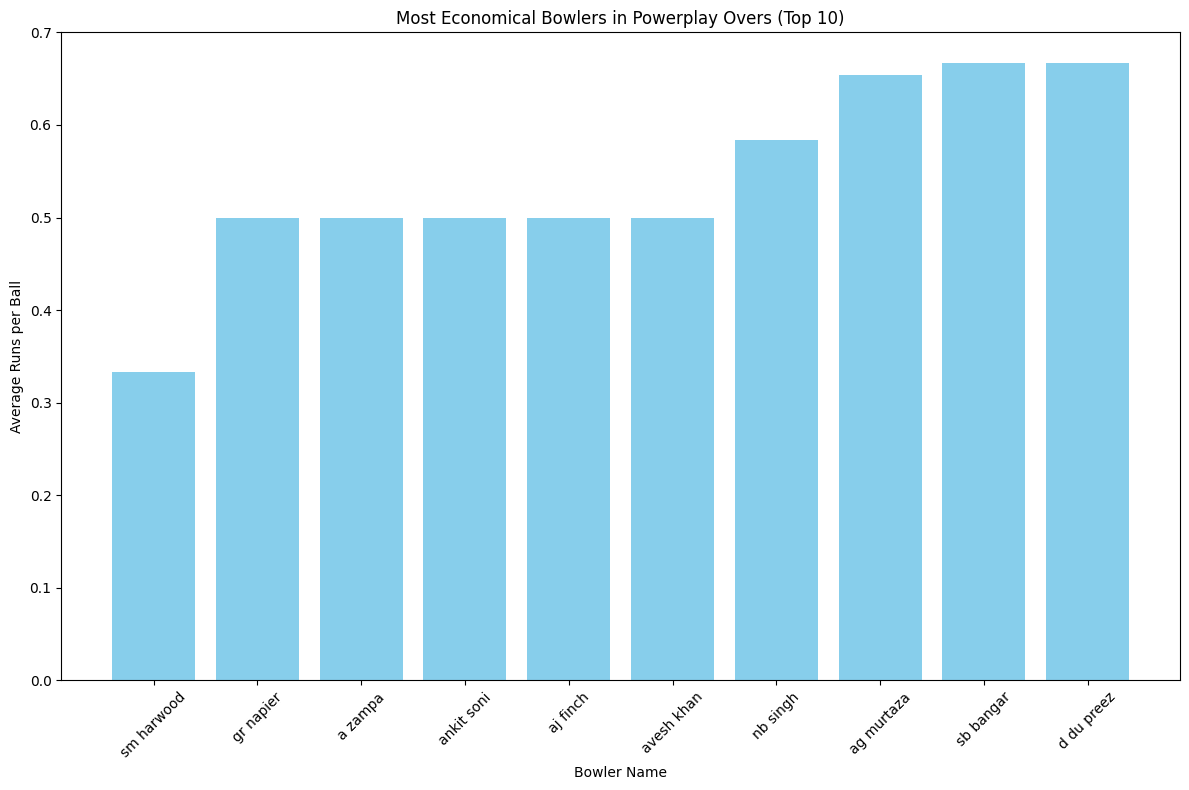

In [0]:
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:

toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
display(toss_impact_individual_matches)

match_id,toss_winner,toss_name,match_winner,match_outcome
335987,Royal Challengers Bangalore,field,Kolkata Knight Riders,Lost
335988,Chennai Super Kings,bat,Chennai Super Kings,Won
335989,Rajasthan Royals,bat,Delhi Daredevils,Lost
335990,Mumbai Indians,bat,Royal Challengers Bangalore,Lost
335991,Deccan Chargers,bat,Kolkata Knight Riders,Lost
335992,Kings XI Punjab,bat,Rajasthan Royals,Lost
335993,Deccan Chargers,bat,Delhi Daredevils,Lost
335994,Mumbai Indians,field,Chennai Super Kings,Lost
335995,Rajasthan Royals,field,Rajasthan Royals,Won
335996,Mumbai Indians,field,Kings XI Punjab,Lost


In [0]:
import seaborn as sns


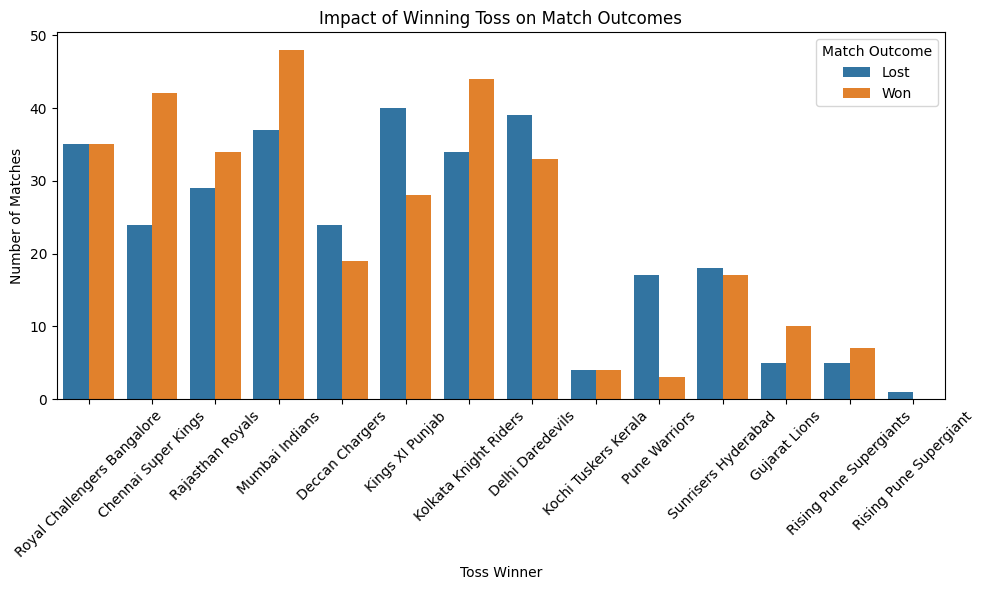

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()